## Introdução

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes. Para isso, será criado um modelo de aprendizagem de máquina. Nesse sentido, é preciso antes fazer uma análise exploratória de dados, pré-processamento dos dados, engenharia e seleção das features. A seguir serão apresentadas estas etapas.

## Análise Exploratória de Dados

A Análise Exploratória de Dados ou EDA (Exploratory Data Analysis) consiste em analisar bases de dados e extrair informações úteis dos dados através de técnicas de visualizaçõe

In [1]:
# Setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurações do Matplotlib
plt.rc("figure", figsize=(10, 6))
sns.set(style="dark", palette="Accent")

In [3]:
# Carregando os dados
port1 = pd.read_csv('../data/estaticos_portfolio1.csv',  index_col=0)
port2 = pd.read_csv('../data/estaticos_portfolio2.csv',  index_col=0)
port3 = pd.read_csv('../data/estaticos_portfolio3.csv',  index_col=0)

market = pd.read_csv('../data/estaticos_market.csv',  index_col=0)

In [4]:
# Shape das bases de dados
print(f'Portfolio 1 possui {port1.shape[0]} registros e {port1.shape[1]} colunas \nPortfolio 2 possui {port1.shape[0]} registros e {port1.shape[1]} colunas \nPortfolio 3 possui {port1.shape[0]} registros e {port1.shape[1]} colunas \nMercado possui {port1.shape[0]} registros e {port1.shape[1]} colunas\n')

Portfolio 1 possui 555 registros e 181 colunas 
Portfolio 2 possui 555 registros e 181 colunas 
Portfolio 3 possui 555 registros e 181 colunas 
Mercado possui 555 registros e 181 colunas



In [5]:
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
port1.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,...,NaN,NaN,NaN,0.0,0.0,2.0,NaN,-100.0,0.0,4
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,False,...,39.454762,91.2,19.333333,14.0,15.0,25.0,-6.666667,-44.0,0.0,3


In [7]:
port2.head()

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...


In [8]:
port3.head()

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...


Após uma breve análise do dataset algumas perguntas surgiram. Com isso, o próximo passo é verificar se as nossas suposições são válidas ou não.

- Quantos empresa tem em cada setor? 
- Quais são os ramos das empresas?
- Em quais  segmentos atuam essas empresas?
- As empresas estão presentes em quais estados?
- Quantos anos tem as empresas?

In [9]:
# Quantos empresa tem em cada setor? 
market['setor'].value_counts()

COMERCIO            211224
SERVIÇO             189644
INDUSTRIA            30893
CONSTRUÇÃO CIVIL     25363
AGROPECUARIA          3247
Name: setor, dtype: int64

In [10]:
# Quais são os ramos das empresas?
market['de_ramo'].value_counts()

COMERCIO VAREJISTA                                   172404
SERVICOS DIVERSOS                                     60318
SERVICOS DE ALOJAMENTO/ALIMENTACAO                    30180
INDUSTRIA DA CONSTRUCAO                               25363
COMERCIO E REPARACAO DE VEICULOS                      22356
SERVICOS ADMINISTRATIVOS                              21326
BENS DE CONSUMO                                       21227
SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS        17371
COMERCIO POR ATACADO                                  16464
TRANSPORTE, ARMAZENAGEM E CORREIO                     15485
SERVICOS DE EDUCACAO                                  11311
SERVICOS DE SAUDE                                      9788
CULTURA, ESPORTE E RECREACAO                           5503
SIDERURGICA-METALURGIA                                 3700
TELECOM                                                3626
PRODUTOS DE AGROPECUARIA                               3247
QUIMICA-PETROQUIMICA                    

In [11]:
# Em quais segmentos atuam essas empressa?
market['nm_segmento'].value_counts()

COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS           211224
OUTRAS ATIVIDADES DE SERVICOS                                         59561
INDUSTRIAS DE TRANSFORMACAO                                           31968
ALOJAMENTO E ALIMENTACAO                                              30180
CONSTRUCAO                                                            25363
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES                  21326
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS                       17371
TRANSPORTE ARMAZENAGEM E CORREIO                                      15485
EDUCACAO                                                              11311
SAUDE HUMANA E SERVICOS SOCIAIS                                       10139
ARTES CULTURA ESPORTE E RECREACAO                                      5503
INFORMACAO E COMUNICACAO                                               5475
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS              3287
AGRICULTURA 

In [12]:
# As empresas estão presentes em quais estados? (estado do escritório principal)
market['sg_uf_matriz'].value_counts()

MA    124823
RN     96743
AM     80032
PI     75201
RO     54876
AC     20028
SP      2845
DF      1225
CE       927
RJ       669
PE       455
PA       425
MG       319
PR       303
MT       257
BA       238
PB       208
GO       199
RS       134
SC       123
ES       100
TO        65
RR        53
MS        51
AL        25
SE        20
AP        15
Name: sg_uf_matriz, dtype: int64

In [13]:
# As empresas estão presentes em quais estados?
market['sg_uf'].value_counts()

MA    127654
RN     98837
AM     82114
PI     76686
RO     56469
AC     20538
Name: sg_uf, dtype: int64

In [14]:
# Quantos anos tem as empresas?
market['idade_emp_cat'].value_counts()

1 a 5      138580
5 a 10     116100
> 20        75572
10 a 15     49205
<= 1        46794
15 a 20     36047
Name: idade_emp_cat, dtype: int64

Aqui podemos notar que maioria das empresas tem entre 1 a 5 anos de existência. Podemos observar também que o número de empresas com menos de um 1 ano é maior que empresas entre 15 e 20 anos. Em um estudo do [Sebrae Nacional](https://m.sebrae.com.br/Sebrae/Portal%20Sebrae/Anexos/Sobrevivencia_das_empresas_no_Brasil=2013.pdf) realizado em 2013, 24,4% delas quebram com menos de 2 anos de existência. Podendo chegar a 50% nos estabelecimentos com menos de 4 anos.

In [15]:
# Idade das empresas por setor
market.groupby('setor')['idade_emp_cat'].value_counts()

setor             idade_emp_cat
AGROPECUARIA      > 20               793
                  5 a 10             751
                  1 a 5              607
                  10 a 15            465
                  15 a 20            374
                  <= 1               257
COMERCIO          1 a 5            61576
                  5 a 10           54120
                  > 20             37145
                  10 a 15          22931
                  <= 1             19261
                  15 a 20          16191
CONSTRUÇÃO CIVIL  1 a 5             8837
                  5 a 10            7034
                  > 20              2935
                  <= 1              2746
                  10 a 15           2187
                  15 a 20           1624
INDUSTRIA         1 a 5             9613
                  5 a 10            7838
                  > 20              5334
                  <= 1              2973
                  10 a 15           2905
                  15 a 20

In [16]:
# Quais são os dados descritivos dos funcionários das empresas?
market['total'].describe()

count    75942.000000
mean        16.706447
std        259.468814
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      51540.000000
Name: total, dtype: float64

In [17]:
# Qual ramo tem os maiores faturamentos estimados?
market.sort_values(by='vl_faturamento_estimado_aux', ascending=False)[['de_ramo', 'vl_faturamento_estimado_aux']].head(10)

,de_ramo,vl_faturamento_estimado_aux
142352,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",1.454662e+10
362046,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",9.961906e+09
418067,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",3.490930e+09
44008,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",3.220832e+09
306951,ELETRICIDADE E GAS,2.669847e+09
321556,ELETRICIDADE E GAS,2.440022e+09
19297,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",2.068780e+09
296053,"TRANSPORTE, ARMAZENAGEM E CORREIO",2.056931e+09
98628,QUIMICA-PETROQUIMICA,2.048888e+09
336924,SERVICOS DE EDUCACAO,2.011597e+09


## Pré-Processamento

O pré-processamento é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições. Essa etapa é de grande importância, pois será determinante para a qualidade final dos dados que serão analisados. Ela pode, inclusive, impactar no modelo de previsão, gerado a partir dos dados.

In [18]:
from sklearn.preprocessing import ( OneHotEncoder, 
                                    MinMaxScaler, 
                                    StandardScaler)

### Dados faltantes

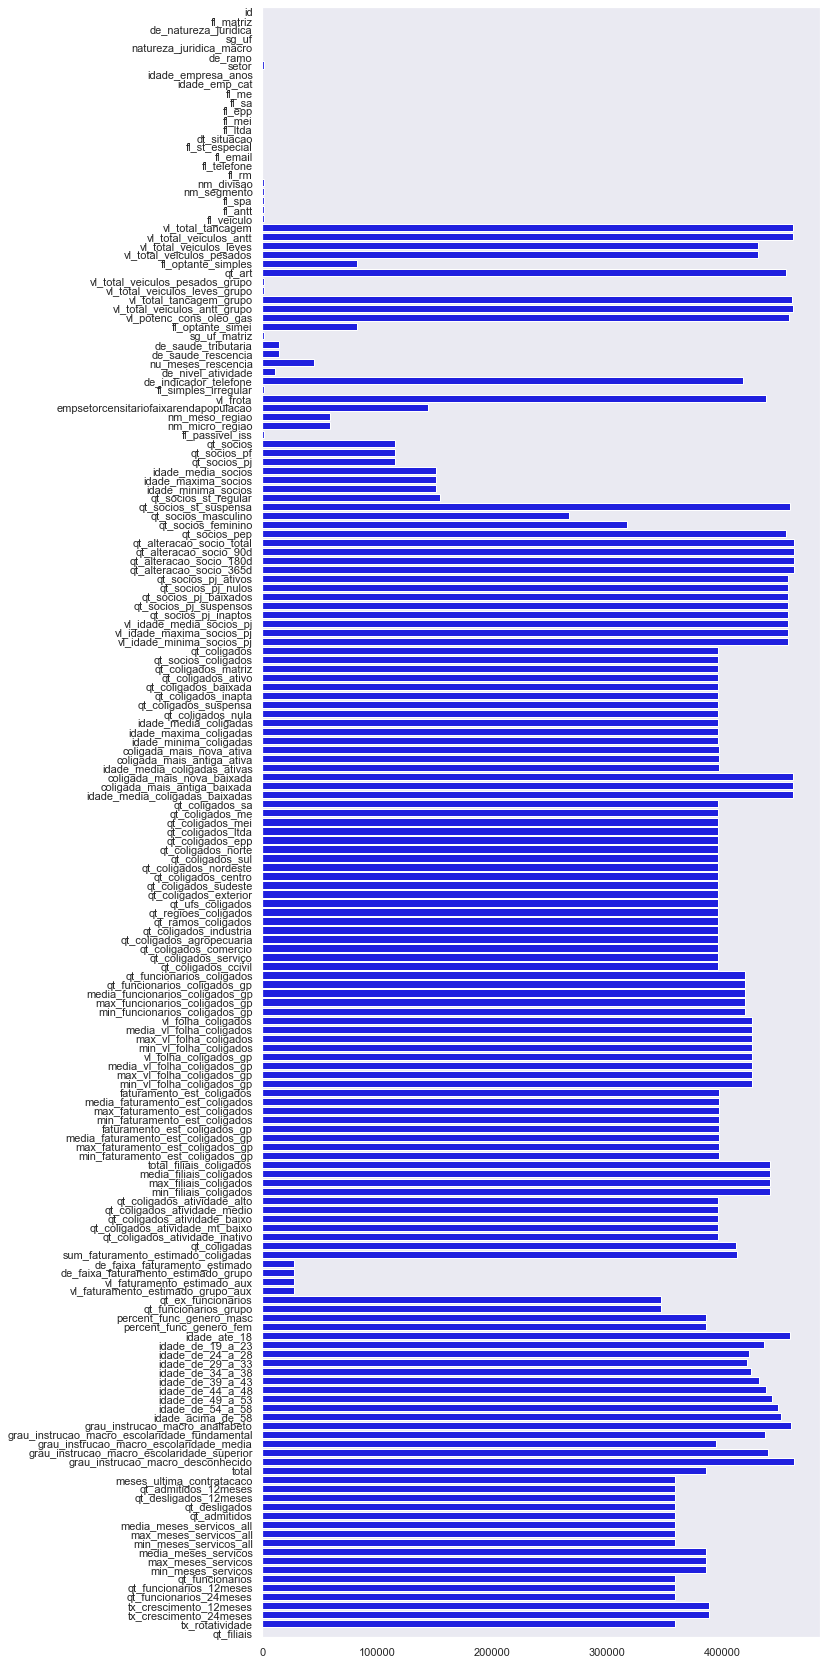

In [19]:
# Gráfico com a quantidade de dados faltantes por coluna
f, ax = plt.subplots(figsize=(10, 30))
sns.barplot(x=market.isna().sum(), y=market.columns, color="b")

Como podemos observar no gráfico acima, o dataset possui muitos dados faltantes. Então para reduzir a quantidade de colunas aqui irei deixar no dataset para análise as colunas que tenham menos de 20% dos faltantes.

In [20]:
# Criação de df auxiliar com dados faltantes
df_missing = pd.DataFrame({'count_missing': market.isna().sum(),
                                 'percent_missing': market.isna().sum() * 100 / len(market)})

df_missing.sort_values(by='percent_missing', ascending=False).head(20)

,count_missing,percent_missing
qt_alteracao_socio_total,462298,100.000000
qt_alteracao_socio_90d,462298,100.000000
grau_instrucao_macro_desconhecido,462298,100.000000
qt_alteracao_socio_180d,462298,100.000000
qt_alteracao_socio_365d,462298,100.000000
coligada_mais_antiga_baixada,462162,99.970582
coligada_mais_nova_baixada,462162,99.970582
idade_media_coligadas_baixadas,462162,99.970582
vl_total_veiculos_antt,462122,99.961929
vl_total_tancagem,462018,99.939433


In [21]:
column_missing = list(df_missing[df_missing['percent_missing' ] < 20].index)
column_missing

['id',
 'fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_empresa_anos',
 'idade_emp_cat',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'fl_optante_simples',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'fl_simples_irregular',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

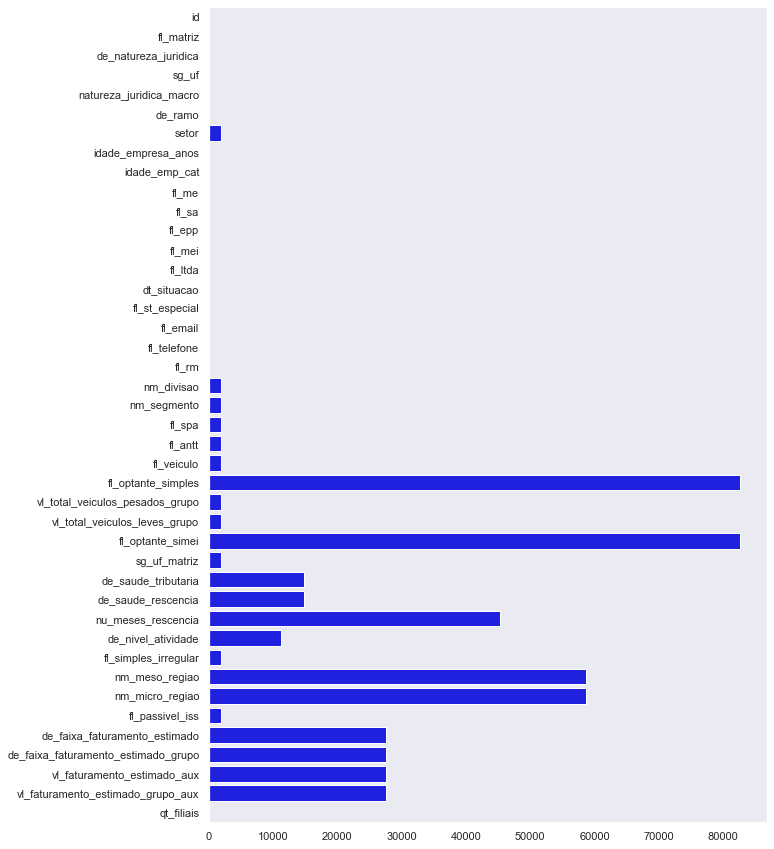

In [22]:
# Gráfico com a quantidade de dados faltantes depois da remoção dos dados com mais de 70% dos dados faltantes
f, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=market[column_missing].isna().sum(), y=column_missing, color="b")

### Transformação dos dados

In [23]:
market[column_missing].head().T

,0,1,2,3,4
id,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...
fl_matriz,True,True,True,True,True
de_natureza_juridica,SOCIEDADE EMPRESARIA LIMITADA,EMPRESARIO INDIVIDUAL,EMPRESARIO INDIVIDUAL,EMPRESARIO INDIVIDUAL,EMPRESARIO INDIVIDUAL
sg_uf,RN,PI,AM,AM,RN
natureza_juridica_macro,ENTIDADES EMPRESARIAIS,OUTROS,OUTROS,OUTROS,OUTROS
de_ramo,INDUSTRIA DA CONSTRUCAO,SERVICOS DE ALOJAMENTO/ALIMENTACAO,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVICOS DIVERSOS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS"
setor,CONSTRUÇÃO CIVIL,SERVIÇO,SERVIÇO,SERVIÇO,SERVIÇO
idade_empresa_anos,14.4575,1.46301,7.09315,6.51233,3.2
idade_emp_cat,10 a 15,1 a 5,5 a 10,5 a 10,1 a 5
fl_me,False,False,False,False,False


In [24]:
# seleção das features
features = [ 'de_natureza_juridica',
             'sg_uf',
             'natureza_juridica_macro',
             'de_ramo',
             'setor',
             'idade_empresa_anos',
             'idade_emp_cat',
             'nm_segmento',
             'sg_uf_matriz',
             'de_saude_tributaria',
             'de_nivel_atividade',
             'vl_faturamento_estimado_aux']

In [25]:
market[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   de_natureza_juridica         462298 non-null  object 
 1   sg_uf                        462298 non-null  object 
 2   natureza_juridica_macro      462298 non-null  object 
 3   de_ramo                      462298 non-null  object 
 4   setor                        460371 non-null  object 
 5   idade_empresa_anos           462298 non-null  float64
 6   idade_emp_cat                462298 non-null  object 
 7   nm_segmento                  460371 non-null  object 
 8   sg_uf_matriz                 460359 non-null  object 
 9   de_saude_tributaria          447447 non-null  object 
 10  de_nivel_atividade           451130 non-null  object 
 11  vl_faturamento_estimado_aux  434785 non-null  float64
dtypes: float64(2), object(10)
memory usage: 45.9+ MB


In [26]:
# variáveis categóricas
cat_features  = market[features].select_dtypes(object).columns

# variáveis numéricas
num_features  = market[features].select_dtypes(np.number).columns

In [27]:
market[ cat_features ] = market[ cat_features ].fillna(-1).astype(str)
market[ num_features ] = market[ num_features ].fillna(-1)
market = market.reset_index(drop=True)

In [28]:
# OneHot Encoder
onehot = OneHotEncoder( sparse=False, handle_unknown='ignore' )
onehot.fit( market[cat_features] )

df_onehot = pd.DataFrame( onehot.transform(market[cat_features]), columns = onehot.get_feature_names( cat_features ) )

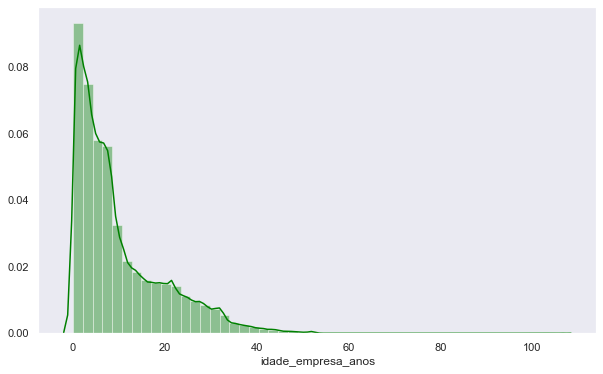

In [29]:
# distribuição da coluna idade_empresa_anos           
ax = sns.distplot(market.idade_empresa_anos, color='g')

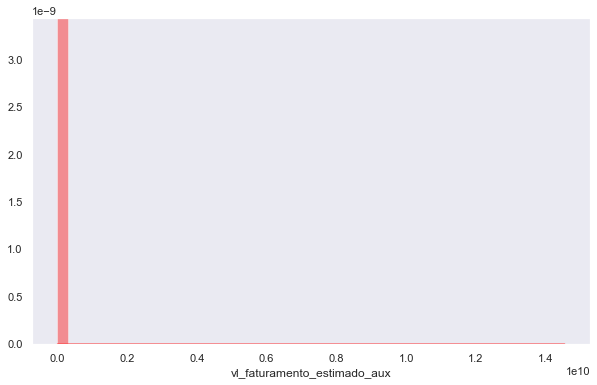

In [30]:
# distribuição da coluna vl_faturamento_estimado_aux  
ax = sns.distplot(market.vl_faturamento_estimado_aux, color='r')

In [31]:
'''
# Normalização
normalizador = MinMaxScaler().fit( market[num_features] )
df_norm = normalizador.transform( market[num_features] )

# transforma o numpy array para um dataframe
df_norm = pd.DataFrame( df_norm, columns = market[num_features].columns )
'''

# Padronização
std = StandardScaler().fit( market[num_features] )

df_std= std.transform( market[num_features] )

df_std = pd.DataFrame( df_std, columns = market[num_features].columns )

In [32]:
df_train = pd.concat( [df_std, df_onehot], axis=1, ignore_index=True )

In [33]:
'''
market = market.set_index('id')
market[features].to_csv('../data/train.csv')
train = pd.read_csv('../data/train.csv', index_col='id')
'''

"\nmarket = market.set_index('id')\nmarket[features].to_csv('../data/train.csv')\ntrain = pd.read_csv('../data/train.csv', index_col='id')\n"

## Modelagem 

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [35]:
port1_X = df_train[market.id.isin(port1.id)]
port1_Y = port1_X.index

port2_X = df_train[market.id.isin(port2.id)]
port2_Y = port2_X.index

port3_X = df_train[market.id.isin(port3.id)]
port3_Y = port3_X.index

In [36]:
# Dividindo dados em treino e teste
X_train_P1, X_test_P1, y_train_P1, y_test_P1 = train_test_split(port1_X, port1_Y, test_size=0.3, shuffle=False)

X_train_P2, X_test_P2, y_train_P2, y_test_P2 = train_test_split(port2_X, port2_Y, test_size=0.3, shuffle=False)

X_train_P3, X_test_P3, y_train_P3, y_test_P3 = train_test_split(port3_X, port3_Y, test_size=0.3, shuffle=False)

In [37]:
# Oversampling Control
smote = SMOTE(random_state=0)

X_train_P1, y_train_P1 = smote.fit_sample( X_train_P1, y_train_P1 )

In [38]:
# Logistic Regression
logit = LogisticRegression()

logit.fit(X_train_P1, y_train_P1)

logit.score(X_train_P1, y_train_P1)

0.5412371134020618

In [39]:
# SVM
clf = SVC(gamma='auto')

clf.fit(X_train_P1, y_train_P1)

clf.score(X_train_P1, y_train_P1)

0.9974226804123711

In [40]:
# Random Forest
forest = RandomForestClassifier()

forest.fit(X_train_P1, y_train_P1)

forest.score(X_train_P1, y_train_P1)

0.9974226804123711

In [41]:
def getLeads(X, y):
    forest = RandomForestClassifier().fit(X, y)

    predict = forest.predict_proba(X)[:,1]

    df_predict = pd.DataFrame(predict)

    leads = list(df_predict.sort_values(0, ascending=False).index)
    
    return market[['id']].loc[leads]

In [42]:
leads_p1 = getLeads(X_train_P1, y_train_P1)
leads_p2 = getLeads(X_train_P2, y_train_P2)
leads_p3 = getLeads(X_train_P3, y_train_P3)

In [43]:
leads_p1.head()

,id
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
336,1b9b40474002c151e68bdf9e832c93f84272fb1452aff5...
307,aad02af02eb4bd71be51944ff4c9f2e527287009821203...
230,c37135fc6994518e0a9c7305c8d5c7d18e5a47e09aba26...
69,bbd655370cd5f665dd542c17a9ae2c8c812dc53b1b3047...


In [44]:
leads_p2.head()

,id
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
146,b888248bbd4413266f7f319e950043595b356ba6eb9bbd...
387,b668d6531fbf120750cb21f6282a7992f2c8e59dc76f5f...
128,dfca2aa363eda36f489c9519ce65a8d058f5a2a120b9f8...
311,467431d69661750adfb5af8900ff617ff324249dac9acd...


In [45]:
leads_p3.head()

,id
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
153,969443cb08aba1e3fc55c5e4fd4db51b19e8aba1b99eab...
164,0866e4a96c02abbd0742c6efbc1c4ffec47e5e6842a956...
45,ab2218ae31a140f03a1e2eca9ef35c3ee8a4d0f420981f...
113,d02d9c5ee6922f69c269a5dc894e765d9320017f1f9b72...
